# <span style="color:#F72585"><center>Reducción de dimensión por t-SNE</center></span>



<figure>
<center>
<img src="../Imagenes/ojo_dios.jpeg" width="400" height="400" align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:NGC7293_(2004).jpg">, Public domain, via Wikimedia Commons

## <span style="color:#4361EE">Referencias</span>

1. [van der Maaten, L.J.P.; Hinton, G.E. Visualizing Data using t-SNE, 2008](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
1. [Hinton y Roweis, Stochatic Neigbor Embedding, 2002](https://proceedings.neurips.cc/paper_files/paper/2002/file/6150ccc6069bea6b5716254057a194ef-Paper.pdf)
1. [van der Maaten, L.J.P. t-Distributed Stochastic Neighbor Embedding](https://lvdmaaten.github.io/tsne/)
1. [Visualizing data using t-SNE, L.J.P. van der Maaten](https://www.researchgate.net/publication/228339739_Viualizing_data_using_t-SNE)
1. [Accelerating t-SNE using Tree-Based Algorithms](https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf)
1. [Kemal Erdem, t-SNE clearly explained](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a)

## <span style="color:#4361EE">Introducción</span>

t-SNE (t-distributed Stochastic Neighbor Embedding) es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas e intenta minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Se recomienda utilizar otro método de reducción de dimensionalidad (por ejemplo, PCA para datos densos o   SVD truncado para datos dispersos) para reducir el número de dimensiones a una cantidad razonable (por ejemplo, 50) si el número de características es muy alto. Esto suprimirá algo de ruido y acelerará el cálculo de distancias por pares entre muestras. Para obtener más consejos, consulte las preguntas frecuentes de Laurens van der Maaten [Visualizing data using t-SNE](https://www.researchgate.net/publication/228339739_Viualizing_data_using_t-SNE).

Debe recordar que t-SNE es iterativo, por lo que, a diferencia de PCA, no puede aplicarlo en otro conjunto de datos. PCA utiliza la matriz de covarianza global para reducir los datos. Puede obtener esa matriz y aplicarla a un nuevo conjunto de datos con el mismo resultado. Eso es útil cuando necesita intentar reducir su lista de funciones y reutilizar la matriz creada a partir de los datos. t-SNE se usa principalmente para comprender datos de alta dimensión y proyectarlos en un espacio de baja dimensión (como 2D o 3D).
t-SNE (t-distributed Stochastic Neighbor Embedding) es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas e intenta minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

## <span style="color:#4361EE">Análisis de Componentes Principales y t-SNE</span>

El análisis de Componentes Principales (ACP)  y el escalado multidimensional clásico son técnicas lineales que se centran en mantener alejadas las representaciones de baja dimensión de puntos de datos diferentes.

Para datos de alta dimensión que se encuentran por grupos cerca de una variedad no lineal de baja dimensión, generalmente es más importante mantener cerca las representaciones de baja dimensión de puntos de datos muy similares. Esto es lo que se busca con t-SNE. Esto  normalmente no es posible con una proyección  lineal como PCA.

## <span style="color:#4361EE">Stochastic Neighbor Embedding (SNE)</span>

El procedimiento t-SNE es una mejora de la técnica SNE introducida por [Hinton y Roweis, 2002](https://proceedings.neurips.cc/paper_files/paper/2002/file/6150ccc6069bea6b5716254057a194ef-Paper.pdf). La incrustación de vecinos estocásticos (SNE) comienza convirtiendo las distancias euclidianas de alta dimensión entre puntos de datos en probabilidades condicionales que representan similitudes. La similitud del punto de datos $x_j$ al punto de datos $x_i$ es la probabilidad condicional, $p_{j|i}$, que $x_i$ elegiría a $x_j$ como su vecino
si los vecinos se eligieran en proporción a su densidad de probabilidad bajo una distribución Gaussiana centrada en $x_i$.

Para puntos de datos cercanos, $p_{j|i}$ es relativamente alto, mientras que para puntos de datos muy separados, $p_{j|i}$ será casi infinitesimal (para valores razonables de la varianza del gaussiano, $\sigma_i^2$). Matemáticamente, el
probabilidad condicional $p_{j|i}$ es dada por

$$
p_{j|i} = \frac{\exp(-||x_i-x_j||^2/2\sigma_i^2)}{\sum_{k\ne i}\exp(-||x_i-x_k||^2/2\sigma_i^2)}
$$

donde $\sigma_i^2$ es la varianza de la distribución gaussiana que está centrada en el punto de datos $x_i$. 
. El método para determinar el valor de $\sigma_i^2$ se presenta más adelante. Como solo nos interesa modelar por pares
similitudes, establecemos el valor de $p_{i|i}$ a cero. Note que el divisor es necesario para tener una autentica distribución de probabilidad.

Para las contrapartes $y_i$ e $y_ji$ en el espacio de proyección de baja dimensión  asociados los datos de alta dimensión $x_i$ y $x j$  es posible calcular una probabilidad condicional similar, que denotamos por $q_{j|i}$. Por simplicidad colocamos la varianza de la densidad Gausiana en este caso  como $\tfrac{1}{\sqrt{2}}$. Entonces  modelamos la similitud del punto del punto proyectado $y_j$ con el punto $y_i$ como

$$
q_{j|i} = \frac{\exp(-||y_i-y_j||}{\sum_{k\ne i}\exp(-||y_i-y_k||^2)}
$$

### <span style="color:#4CC9F0">Función de pérdida</span>

El problema en SNE es encontrar un conjunto de puntos $\mathcal{Y}  = \{y_1, \ldots,y_n\}$ en el espacio de proyeción, de tal manera que las distribuciones $p_{j|i}$ y   $q_{j|i}$ sena lo más cercanas posible. La función de pérdida natural para este problema es la divergencia de Kullback-Leibler dada por

$$
\mathfrak{L} = \sum_i \text{KL}(P_i||Q_i) = \sum_i \sum_j p_{j|i} \log \frac{p_{j|i}}{q_{j|i}}.
$$

### <span style="color:#4CC9F0">Varianzas $\sigma_i^2$</span>

El parámetro restante a seleccionar es la varianza $\sigma_i^2$ del Gaussiano que está centrada sobre cada punto de datos de alta dimensión, $x_i$. No es probable que exista un único valor de $\sigma_i^2$ que sea optimo para todos los puntos de datos del conjunto de datos porque es probable que la densidad de los datos varíe. En regiones densas, un valor menor de $\sigma_i^2$ suele ser más apropiado que en regiones más dispersas. Cualquier valor particular de $\sigma_i^2$
induce una distribución de probabilidad, $P_i$, sobre todos los demás puntos de datos. Esta distribución tiene una
entropía que aumenta como $\sigma_i^2$ aumenta. SNE realiza una búsqueda binaria del valor de $\sigma_i^2$ que produce un $P_i$ con una perplejidad fija que es especificada por el usuario. 

En las implementaciones practicas, se hace una busqueda binaria del valor de $\sigma_i^2$ de tal manera que la distribución resultante tenga un perplexity prefijado de antemano. Definamos entonces lo que es perplexity.

### <span style="color:#4CC9F0">Perplejidad (perplexity)</span>

La perplejidad se define como

$$
Perp(P_i) = 2^{-\sum p_{j|i}\log_2 p_{j|i}}.
$$

Observe que $-\sum p_{j|i}\log p_{j|i}$ es la entropía de Shannon.  Pero a menos que quiera implementar t-SNE usted mismo, lo único que necesita saber es que la perplejidad que elija se correlaciona positivamente con el valor de $\sigma_i$ y para la misma perplejidad tendrá múltiples $\sigma_i$ diferentes, según las distancias. El valor típico de perplejidad oscila entre 5 y 50. Por defecto,  el modelo t-SNE en la librería `scikit learn` de define este valor como 30.

## <span style="color:#4361EE">¿Cómo trabaja t-SNE?</span> 



<figure>
<center>
<img src="../Imagenes/sphx_glr_plot_t_sne_perplexity_001.png" width="800" height="800" align="center" /> 
</center>   
</figure>

Fuente: [scikit-learn](https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html)

A la izquierda la imagen original de los datos. 

De acuerdo con los autores de la  técnica, ellos introdujeron  **t-SNE** , para visualizar el la similaridad resultante de un conjunto de datos lograndoe capturar gran parte de la estructura local de alta dimensió 
datos muy bien, al tiempo que revelan una estructura global como la presencia de conglomerados en varias escalas.

### <span style="color:#4CC9F0">Distribución de probabilidad en el espacio de origen</span>

El [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) establece que "la similitud del punto de datos $x_j$ con el punto de datos $x_i$ es la probabilidad condicional $p_{j|i} = P[x_j|x_i]$, de que $x_i$ elegiría a $x_j$ como su vecino". 

Elegimos  uno de los puntos del conjunto de datos.  Ahora tenemos que escoger otro punto y calcular la Distancia Euclidiana entre ellos $|x_i - x_j|$. 

En el [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) se establece que esta distancia tiene que ser proporcional a la densidad de probabilidad bajo una distribución gaussiana centrada en $x_i$. 

Entonces, debemos generar una distribución gaussiana centrada en  $x_i$ donde similitud del punto de datos $x_j$ con el punto  $x_i$ es la probabilidad condicional $p_{j|i} = P[x_j|x_i]$, de que $x_i$ elegiría a $x_j$ como su vecino". 

Elegimos  uno de los puntos del conjunto de datos.  Ahora tenemos que escoger otro punto y calcular la Distancia Euclidiana entre ellos $|x_i - x_j|$. 





### <span style="color:#4CC9F0">Clústeres dispersos y varianza </span>

Hasta este punto, nuestros grupos estaban estrechamente delimitados dentro de su grupo. ¿Qué pasa si tenemos un nuevo clúster?

Puede distinguir entre puntos similares y no similares, pero los valores absolutos de probabilidad son mucho más pequeños que en el primer ejemplo (compare los valores del eje $Y$).

Podemos arreglar eso dividiendo el valor de proyección actual por la suma de las proyecciones.


$$
p_{j|i} = \frac{g(|x_i-x_j|)}{\sum_{k\ne i}g(|x_i-x_k|)} = \frac{\exp(-||x_i-x_j||^2/2\sigma_i^2)}{\sum_{k\ne i}\exp(-||x_i-x_k||^2/2\sigma_i^2)}
$$




### <span style="color:#4CC9F0">Manejo de diferentes distancias </span>

Si tomamos dos puntos e intentamos calcular la probabilidad condicional entre ellos, entonces los valores de $p_{i|j}$ y $p_{j|i}$ serán diferentes. 

La razón de esto es que provienen de dos distribuciones diferentes. ¿Cuál deberíamos elegir para el cálculo entonces?


$$
p_{ij} = \frac{p_{ij}+ p_{ji}}{2N},
$$

en donde $N$ es el número de dimensiones.

### <span style="color:#4CC9F0">Crear un espacio de baja dimensión</span>

La siguiente parte de t-SNE es crear un espacio de baja dimensión con el mismo número de puntos que en el espacio original. Los puntos deben distribuirse al azar en un nuevo espacio. El objetivo de este algoritmo es encontrar una distribución de probabilidad similar en un espacio de baja dimensión. La opción más obvia para una nueva distribución sería usar la gaussiana nuevamente como en SNE.

Esa no es la mejor idea, desafortunadamente. Una de las propiedades de la distribución gaussiana es que tiene una "cola corta" y por eso crea un problema de hacinamiento. Para resolver eso vamos a usar la distribución t de Student con un solo grado de libertad. Más información sobre cómo se seleccionó esta distribución y por qué la gaussiana no es la mejor idea que puede encontrar en el [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). Ahora nuestra nueva fórmula se verá así: el modelo t-SNE en la librería `scikit learn` de define este valor como 30..
La siguiente parte de t-SNE es crear un espacio de baja dimensión con el mismo número de puntos que en el espacio original. Los puntos deben distribuirse al azar en un nuevo espacio. El objetivo de este algoritmo es encontrar una distribución de probabilidad similar en un espacio de baja dimensión. La opción más obvia para una nueva distribución sería usar la gaussiana nuevamente. 

Esa no es la mejor idea, desafortunadamente. Una de las propiedades de la distribución gaussiana es que tiene una "cola corta" y por eso crea un problema de hacinamiento. Para resolver eso vamos a usar la distribución t de Student con un solo grado de libertad. Más información sobre cómo se seleccionó esta distribución y por qué la gaussiana no es la mejor idea que puede encontrar en el [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). Ahora nuestra nueva fórmula se verá así: 


$$
q_{j|i} =  \frac{(1+||y_i-y_j||^2 )^{-1}}{\sum_{k\ne i}(1+||y_i-y_k||^2 )^{-1}}
$$


### <span style="color:#4CC9F0">Optimización: Gradiente descendiente</span>

EL problema que resta resolver, es encontrar los puntos $y_i$ en el espacio de proyección. Para lograrlo, se usa la divergencia de Kullback-Leibler  entre la distribución de referencia $p_{j|i}$ y la distribución aproximante   $q_{j|i}$, que denotamos $\mathcal{D}_{KL}(P||Q) $. Recuerde que

EL problema que resta resolver, es encontrar los puntos $y_i$ en el espacio de proyección. Para lograrlo, se usa la divergencia de Kullback-Leibler  entre la distribución de referencia $p_{j|i}$ y la distribución aproximante   $q_{j|i}$, que denotamos $\mathcal{D}_{KL}(P||Q) $. Recuerde que


$$
\mathcal{D}_{KL}(P||Q) = \sum_{x \in \mathcal{X}} p(x) \log \left(\frac{P(x)}{Q(x)}\right).
$$

No vamos a desarrollar los detalles matemáticos, solamente mostramos el cálculo del gradiente:

$$
\frac{\partial \mathcal{D}}{\partial y_j} = 4\sum_{j}(p_{ij}- q_{ij})(y_i-y_j)(1+ ||y_i - y_j||^2)^{-1}.
$$

#### <span style="color:#4CC9F0">Ejercicio</span>

Verifique la ecuación anterior.

### <span style="color:#4CC9F0">Algortimo básico t-SNE</span>

 Algoritmo:  versión simple de incrustación de vecinos estocásticos distribuidos en t.
1. **Datos**: conjunto de datos $\mathcal{X} = \{x_1, x_2,\ldots, x_n\}$,
1. **Función de pérdida**: divergencia KL $\mathcal{D}_{KL}(P||Q) = \sum_{x \in \mathcal{X}} p(x) \log \left(\frac{P(x)}{Q(x)}\right)$.
1. **Parámetros de optimización**: número de iteraciones $T$, tasa de aprendizaje $\eta$ , momento $\alpha(t)$.
1. **Resultado**: representación de datos de baja dimensión $\mathcal{Y}^{(T)}= \{y_1, y_2,\ldots, y_n\}$
1. **Perplexity**: defina $\text{Perp}(P_i) = 2^{-\sum p_{j|i}\log_2 p_{j|i}}$.
1. **Gradiente**: defina $\frac{\partial \mathcal{D}}{\partial y_j} = 4\sum_{j}(p_{ij}- q_{ij})(y_i-y_j)(1+ ||y_i - y_j||^2)^{-1}$.
1. **Afinidad en espacio original**: defina $p_{j|i} =  \frac{\exp(-||x_i-x_j||^2/2\sigma_i^2)}{\sum_{k\ne i}\exp(-||x_i-x_k||^2/2\sigma_i^2)}$.
1. **Afinidad en espacio de proyección (embedding)**: defina $q_{j|i} =  \frac{(1+||y_i-y_j||^2 /2\sigma_i^2)^{-1}}{\sum_{k\ne i}(1+||y_i-y_k||^2 /2\sigma_i^2)^{-1}}.$
1. Inicio
    1. calcule las afinidades por pares $p_{j|i}$ con perplejidad Perp (usando la Ecuación 5)
    1. definir $p_{ij} = \frac{p_{j|i}+p_{i| j}}{2n}$
    1. solución inicial una muestra $\mathcal{Y}^{(0)}= \{y_1, y_2,\ldots, y_n\}$ de la distribución gaussiana $N (0,10−4)$
    1. para $t=1,2,\ldots,T$ hacer:
        1. calcular afinidades de baja dimensión $q_{ij}$ (usando la Ecuación 8)
        1. calcular el gradiente $\frac{\partial \mathcal{D}}{\partial \mathbf{y}}$ (usando la Ecuación 6)
        1. actualizar  $\mathcal{Y}^{(t)} = \mathcal{Y}^{(t-1)} + \eta \frac{\partial \mathcal{D}}{\partial \mathbf{y}} + \alpha(y)(\mathcal{Y}^{(t-1)}-\mathcal{Y}^{(t-2)})$ 
        1. fin
    1. fin
    
En los experimentos de los autores, $\alpha(t)=0.5$ para $t<250$ y $\alpha(t)=0.8$ para $t\ge 250$.

## <span style="color:#4361EE">Ejemplo con los dígitos </span>

En este ejemplo tomamos  el dataset `digits` de los datasets de scikit learn. 

Cada punto de datos es una imagen de 8x8 de un dígito.

* Clases: 10
* Muestras por clase: ~180
* Muestras totales: 1797
* dimensionalidad: 64
* características:  números enteros 0-16


(1797, 64)


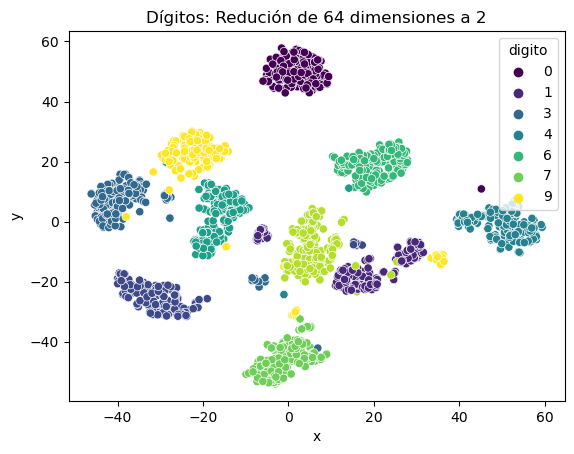

In [5]:
# librerías
from sklearn.datasets import load_digits
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd

# datos
digits = load_digits()
print(digits.data.shape)
# (1797, 64)

# embedding
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='pca', perplexity=30).fit_transform(digits.data)
#plot
data_plot = pd.DataFrame(X_embedded)
data_plot.columns = ['x','y']
data_plot['digito'] = digits.target
data_plot
sns.scatterplot(data=data_plot, x='x', y='y', hue='digito', palette='viridis').set(title='Dígitos: Redución de 64 dimensiones a 2')
plt.show()

## <span style="color:#4361EE">Como usar efectivamente t-SNE </span>

[Como usar efectivamente t-SNE](https://distill.pub/2016/misread-tsne/)